In [1]:
from google.colab import drive
drive.mount('/content/ddrive')

Mounted at /content/ddrive


In [2]:
# import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.metrics import classification_report

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = "2"

In [4]:
gpus = tf.config.experimental.list_physical_devices(device_type="GPU")

if len(gpus) == 0:
    print("Not connected with gpu")
else:
    print("Connected with gpu")
    print(gpus)

Not connected with gpu


In [5]:
data_dir = '/content/ddrive/MyDrive/archive/Padded_imgs'

epochs = 25

image_shape = (224, 224)

In [6]:
### GETTING ALL THE CLASSES IN THE DATASET

os.listdir(data_dir)

['BRDM_2', 'ZIL131', 'ZSU_23_4', 'T62', 'D7', 'SLICY', '2S1', 'BTR_60']

In [7]:
### PRINTING FIRST FIVE IMAGES IN ALL THE DIRECTORIES

for class_ in os.listdir(data_dir):
    print(os.listdir(os.path.join(data_dir,class_))[:5])

['HB15487.JPG', 'HB15493.JPG', 'HB15464.JPG', 'HB15450.JPG', 'HB15448.JPG']
['HB15009 (copy).JPG', 'HB14995 (copy).JPG', 'HB15016.JPG', 'HB15011.JPG', 'HB15010.JPG']
['HB15410.JPG', 'HB15403.JPG', 'HB15409.JPG', 'HB15456.JPG', 'HB15413.JPG']
['HB15011.JPG', 'HB15000.JPG', 'HB15016 (copy).JPG', 'HB14998.JPG', 'HB15015.JPG']
['HB14933.JPG', 'HB14959.JPG', 'HB14936.JPG', 'HB14963.JPG', 'HB14960.JPG']
['HB16953.JPG', 'HB15583.JPG', 'HB15588.JPG', 'HB16992.JPG', 'HB17005.JPG']
['HB15132.JPG', 'HB15135.JPG', 'HB15122.JPG', 'HB15141.JPG', 'HB15125.JPG']
['HB03832 (copy).JPG', 'HB03832 (another copy).JPG', 'HB03846 (another copy).JPG', 'HB03839 (copy).JPG', 'HB03843.JPG']


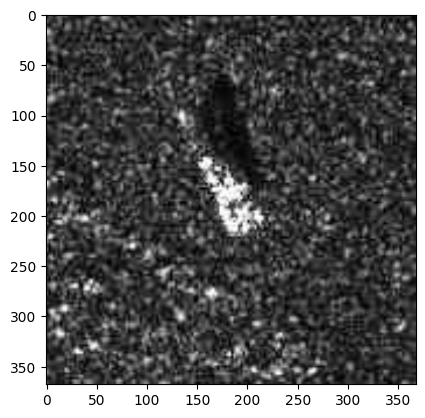

In [8]:
img = cv2.imread(os.path.join(data_dir, '2S1', 'HB14931.JPG' ))

plt.imshow(img);

In [9]:
data = tf.keras.utils.image_dataset_from_directory(
    '/content/ddrive/MyDrive/archive/Padded_imgs',
    batch_size=16,
    image_size=image_shape,
    shuffle=True
)

Found 9466 files belonging to 8 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)


print(f"Train data size {train_size}")
print(f"Train data size {test_size}")
print(f"Train data size {val_size}")

Train data size 414
Train data size 118
Train data size 118


In [12]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
#test_data = data.skip(train_size+val_size).take(test_size)
test_data = data.skip(train_size+val_size).take(1)

In [13]:
test_images = []
test_labels = []

for image, label in test_data:
    test_images.append(image)
    test_labels.append(label)

In [15]:
test_images = np.array(test_images)

In [16]:
test_images.shape

(1, 16, 224, 224, 3)

In [19]:
test_labels = np.array(test_labels)

In [20]:
test_labels.shape

(1, 16)

In [31]:
x = loaded_model(test_images[0])

In [37]:
np.argmax(x[1])

4

In [36]:
test_labels[0]

array([4, 1, 6, 5, 7, 5, 2, 2, 5, 6, 1, 7, 0, 2, 5, 2], dtype=int32)

In [ ]:
y_pred = tf.argmax(model.predict(test_data) ,axis=1).numpy()

In [39]:
x = loaded_model.predict(test_data)

1/1 [==============================] - 24s 24s/step


In [40]:
x.shape

(16, 8)

In [43]:
np.argmax(x[1])

0

In [ ]:
cd /content/ddrive/MyDrive/layerweight

/content/ddrive/MyDrive/layerweight


In [ ]:
  x=[]
  import numpy as np
  x=np.array(test_images[0])
  np.save('image0.npy',x)


In [ ]:
x.shape

(16, 224, 224, 3)

In [ ]:
np.argmax(test_labels[50])

2

In [ ]:
out.shape


TensorShape([16, 8])

In [ ]:
out

<tf.Tensor: shape=(16, 8), dtype=float32, numpy=
array([[1.48552459e-07, 1.57597556e-03, 1.69126596e-02, 2.06778022e-05,
        9.35605611e-04, 9.80517566e-01, 3.69689078e-05, 4.12353046e-07],
       [1.97836001e-11, 2.13735762e-09, 1.00783897e-08, 4.95001687e-17,
        1.00000000e+00, 1.26361843e-09, 2.48057342e-14, 3.90324023e-11],
       [3.09703930e-04, 6.09764713e-04, 2.97747762e-03, 4.10489825e-04,
        1.17851618e-04, 1.12065365e-07, 9.94826615e-01, 7.47939455e-04],
       [2.57704925e-12, 6.78049439e-09, 3.96206786e-07, 2.92175412e-17,
        9.99999642e-01, 5.07827060e-08, 1.65579356e-14, 6.73580636e-12],
       [9.99943376e-01, 2.56518784e-09, 1.79538119e-07, 2.34601394e-10,
        5.18866145e-05, 9.02883185e-11, 1.13399312e-06, 3.36043627e-06],
       [6.01004250e-02, 1.82681033e-04, 2.29708003e-05, 4.07647394e-06,
        5.99687397e-01, 2.73590302e-07, 2.97316128e-05, 3.39972407e-01],
       [6.48377172e-05, 2.37542726e-02, 4.00804821e-03, 5.67454903e-04,
        3

In [ ]:
np.argmax(out[0])

5

In [ ]:

file = open("image0.txt", "w")
for i in range(0,16):
  for j in range(0,224):
    for k in range(0,224):
      for l in range(0,3):
        content = str(x[i][j][k][l])
        file.write(content)
        file.write(", \n")
file.close()

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Input

# Input shape for the network (adjust according to your data)
input_shape = (224, 224, 3)

# Create an input layer
input_tensor = Input(shape=input_shape)

# Create MobileNetV1 model
mobilenet_model = MobileNet(input_shape=input_shape, include_top=True, weights=None, classes=8)

# Summary of the model architecture
#mobilenet_model.summary()


In [ ]:

input = Input(shape=image_shape+(3,))
x = mobilenet_model(input)
x = Flatten()(x)
x = Dense(256,activation = "relu")(x)
output= Dense(units=8, activation="softmax")(x)

model = Model(inputs=input, outputs=output)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(),
metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data, epochs = epochs,validation_data=val_data)

Epoch 1/25
414/414 [==============================] - 81s 136ms/step - loss: 1.6855 - accuracy: 0.3229 - val_loss: 2.6980 - val_accuracy: 0.1139
Epoch 2/25
414/414 [==============================] - 54s 131ms/step - loss: 1.2427 - accuracy: 0.4567 - val_loss: 1.3813 - val_accuracy: 0.4523
Epoch 3/25
414/414 [==============================] - 53s 128ms/step - loss: 1.0116 - accuracy: 0.5062 - val_loss: 1.3540 - val_accuracy: 0.4359
Epoch 4/25
414/414 [==============================] - 53s 128ms/step - loss: 0.8819 - accuracy: 0.5338 - val_loss: 1.0599 - val_accuracy: 0.4921
Epoch 5/25
414/414 [==============================] - 55s 132ms/step - loss: 0.7013 - accuracy: 0.6223 - val_loss: 0.6011 - val_accuracy: 0.6642
Epoch 6/25
414/414 [==============================] - 55s 131ms/step - loss: 0.4750 - accuracy: 0.7687 - val_loss: 0.3927 - val_accuracy: 0.8014
Epoch 7/25
414/414 [==============================] - 55s 132ms/step - loss: 0.3744 - accuracy: 0.7970 - val_loss: 0.3018 - val_ac

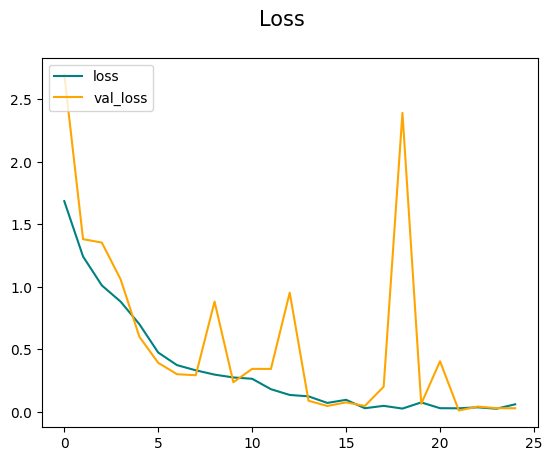

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'teal', label = 'loss' )
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

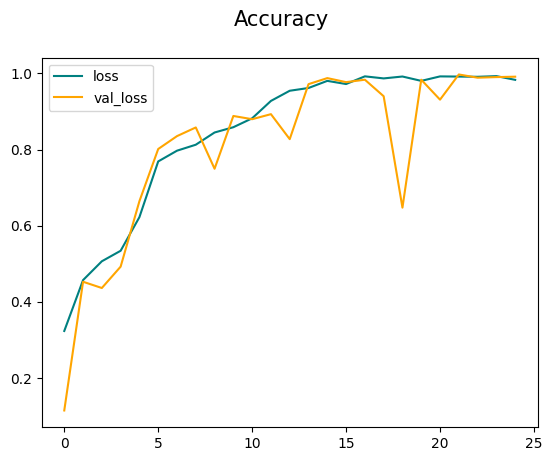

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'loss' )
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

In [ ]:
y_pred = tf.argmax(model.predict(test_data) ,axis=1).numpy()

60/60 [==============================] - 22s 43ms/step


In [ ]:

y_true = []

for batch in test_data.as_numpy_iterator():
    X, y = batch
    y_true.append(list(y))

In [ ]:
y_true = np.array(sum(y_true, []))

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.14      0.15       125
           1       0.14      0.14      0.14       146
           2       0.11      0.11      0.11       144
           3       0.04      0.04      0.04        50
           4       0.20      0.19      0.19       129
           5       0.12      0.13      0.12       111
           6       0.13      0.13      0.13       104
           7       0.16      0.17      0.16       145

    accuracy                           0.14       954
   macro avg       0.13      0.13      0.13       954
weighted avg       0.14      0.14      0.14       954



In [ ]:
# Save the model architecture to JSON file
mobilenet_model_json = mobilenet_model.to_json()
with open("mobilenet_model.json", "w") as json_file:
    json_file.write(mobilenet_model_json)

In [ ]:
# Save the model weights to HDF5 file
mobilenet_model.save_weights("mobilenet_model.h5")

In [22]:
from keras.models import model_from_json

In [26]:
cd /content/ddrive/MyDrive/layerweight

/content/ddrive/MyDrive/layerweight


In [27]:
# Load the model architecture from JSON file
with open("mobilenet_model.json", "r") as json_file:
    loaded_mobilenet_model_json = json_file.read()
loaded_model = model_from_json(loaded_mobilenet_model_json)

In [28]:
# Load the model weights from HDF5 file
loaded_model.load_weights("mobilenet_model.h5")

In [29]:
loaded_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
out=loaded_model(test_images[50])

In [ ]:
out.shape

TensorShape([16, 8])

In [ ]:
out[0]

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([1.4855246e-07, 1.5759756e-03, 1.6912660e-02, 2.0677802e-05,
       9.3560561e-04, 9.8051757e-01, 3.6968908e-05, 4.1235305e-07],
      dtype=float32)>

In [ ]:
np.argmax(out[0])

5

In [ ]:
predictions = model.predict(test_data)

60/60 [==============================] - 21s 45ms/step
